In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import os
from time import time
import numpy as np

print(tf.__version__)

1.12.0


In [2]:
mnist = keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
Ntrain_data=train_data.astype('float32')/255
Ntrain_data=np.reshape(Ntrain_data,(-1,28,28,1))

Ntest_data=test_data.astype('float32')/255
Ntest_data=np.reshape(Ntest_data,(-1,28,28,1))

Ntrain_y=keras.utils.to_categorical(train_labels)
Ntest_y=keras.utils.to_categorical(test_labels)

load=False

In [4]:
n_classes=10
model = keras.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),strides=1,padding='SAME',input_shape=(28,28,1),data_format="channels_last"))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(strides=[2,2],padding='SAME'))
model.add(keras.layers.Conv2D(32,(3,3),strides=[1,1],padding='SAME'))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(strides=[2,2],padding='SAME'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(n_classes, activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [5]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
tensorboard = keras.callbacks.TensorBoard(log_dir="C:/logs/{}".format(time()),write_grads=True,write_images=True,histogram_freq=1)

In [7]:
batchsize=64
Nbatches=Ntrain_data.shape[0]/batchsize

In [8]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


if load == True:
    latest=tf.train.latest_checkpoint(checkpoint_dir)
    model.load_weights(latest)
else:
    cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1,period=2)
    #model.save_weights('./checkpoints/my_checkpoint')


    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(Ntrain_data, Ntrain_y, epochs=10,validation_data=[Ntest_data, Ntest_y],batch_size=batchsize,
              callbacks=[tensorboard,cp_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2408 - acc: 0.9268 - val_loss: 0.0885 - val_acc: 0.9696
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0744 - acc: 0.9772
Epoch 00002: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 20s 326us/step - loss: 0.0744 - acc: 0.9772 - val_loss: 0.0569 - val_acc: 0.9810
Epoch 3/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0534 - acc: 0.9833 - val_loss: 0.0534 - val_acc: 0.9830
Epoch 4/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.0405 - acc: 0.9873
Epoch 00004: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 18s 304us/step - loss: 0.0405 - acc: 0.9873 - val_loss: 0.0484 - val_acc: 0.9831
Epoch 5/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0336 - acc: 0.9892 - val_loss: 0.0346 - val_acc

In [13]:
10e3*0.9887

9887.0

   val_loss  val_acc      loss       acc  epoch
5  0.042613   0.9865  0.027748  0.991367      5
6  0.035952   0.9892  0.024034  0.992250      6
7  0.049046   0.9858  0.019326  0.993567      7
8  0.040345   0.9889  0.017229  0.994167      8
9  0.040759   0.9887  0.014622  0.995317      9


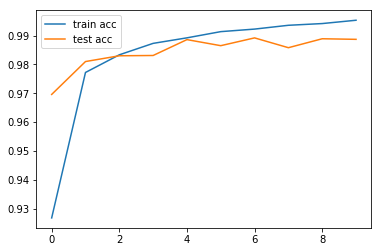

In [15]:
if load == False:    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    print(hist.tail())
    plt.plot(hist['epoch'],hist['acc'])
    plt.plot(hist['epoch'],hist['val_acc'])
    plt.legend(['train acc','test acc'])

In [16]:
model.save('kerasMNIST_ModelConv.h5')